# Customer-Churn-Prediction
Customer churn in telecom business. Builded a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model
The objective is to build a classifier for prediction of customer churn.
This dataset was taken from Kaggle and has 1000 samples.
By carefully observing the attributes,the appropriate visualization has been performed.
The target variable here is 'exited'.
Used algorithm -ANN

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Load the data

In [6]:
df = pd.read_csv('customer-churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2765,2969-QWUBZ,Female,0.0,No,No,2.0,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,51.40,96.8,No
1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,1140-UKVZG,Female,0.0,No,No,17.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,24.80,475.25,No
3775,8930-XOTDP,Female,0.0,Yes,Yes,18.0,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.8,No


#### Data preprocessing

In [7]:
df.drop('customerID', axis = 1 ,inplace = True)
df.dtypes

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
3966    1990.50
3967    7362.90
3968     346.45
3969     306.60
3970    6844.50
Name: TotalCharges, Length: 3971, dtype: float64

In [10]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3966    False
3967    False
3968    False
3969    False
3970    False
Name: TotalCharges, Length: 3971, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0.0,No,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0.0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3598,Female,0.0,Yes,Yes,0.0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(3971, 20)

In [13]:
df1 = df[df.TotalCharges != " "]
df1.shape

(3966, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\samik\AppData\Local\Temp\ipykernel_14608\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [16]:
df1.dtypes

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

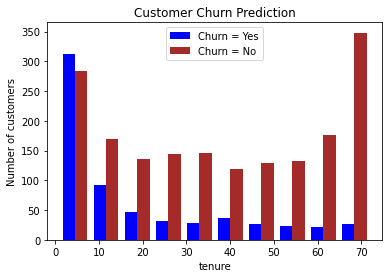

In [20]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title('Customer Churn Prediction')
plt.hist([tenure_churn_yes,tenure_churn_no], color=['blue','brown'],label =['Churn = Yes','Churn = No'])
plt.legend()

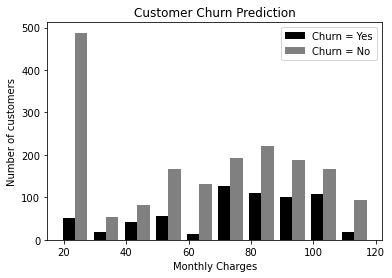

In [25]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title('Customer Churn Prediction')
plt.hist([mc_churn_yes,mc_churn_no], color=['black','grey'],label =['Churn = Yes','Churn = No'])
plt.legend()

In [26]:
for c in df:
    print(c)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [27]:
for c in df:
    print(f'{c} :  {df[c].unique()}')

gender :  ['Female' 'Male' nan]
SeniorCitizen :  [ 0.  1. nan]
Partner :  ['Yes' 'No' nan]
Dependents :  ['No' 'Yes' nan]
tenure :  [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39. nan]
PhoneService :  ['No' 'Yes' nan]
MultipleLines :  ['No phone service' 'No' 'Yes' nan]
InternetService :  ['DSL' 'Fiber optic' 'No' nan]
OnlineSecurity :  ['No' 'Yes' 'No internet service' nan]
OnlineBackup :  ['Yes' 'No' 'No internet service' nan]
DeviceProtection :  ['No' 'Yes' 'No internet service' nan]
TechSupport :  ['No' 'Yes' 'No internet service' nan]
StreamingTV :  ['No' 'Yes' 'No internet service' nan]
StreamingMovies :  ['No' 'Yes' 'No internet service' nan]
Contract :  ['Month-to-month' 'One year' 'Two year' nan]
PaperlessBilling :  ['Yes' 'No' nan]

In [28]:
def print_unique_col_values(df):
    for c in df:
        if df[c].dtypes == 'object':
            print(f'{c} :  {df[c].unique()}')

In [29]:
print_unique_col_values(df1)

gender :  ['Female' 'Male' nan]
Partner :  ['Yes' 'No' nan]
Dependents :  ['No' 'Yes' nan]
PhoneService :  ['No' 'Yes' nan]
MultipleLines :  ['No phone service' 'No' 'Yes' nan]
InternetService :  ['DSL' 'Fiber optic' 'No' nan]
OnlineSecurity :  ['No' 'Yes' 'No internet service' nan]
OnlineBackup :  ['Yes' 'No' 'No internet service' nan]
DeviceProtection :  ['No' 'Yes' 'No internet service' nan]
TechSupport :  ['No' 'Yes' 'No internet service' nan]
StreamingTV :  ['No' 'Yes' 'No internet service' nan]
StreamingMovies :  ['No' 'Yes' 'No internet service' nan]
Contract :  ['Month-to-month' 'One year' 'Two year' nan]
PaperlessBilling :  ['Yes' 'No' nan]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' nan]
Churn :  ['No' 'Yes' nan]


In [30]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

C:\Users\samik\AppData\Local\Temp\ipykernel_14608\477714218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace = True)
C:\Users\samik\AppData\Local\Temp\ipykernel_14608\477714218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [31]:
print_unique_col_values(df1)

gender :  ['Female' 'Male' nan]
Partner :  ['Yes' 'No' nan]
Dependents :  ['No' 'Yes' nan]
PhoneService :  ['No' 'Yes' nan]
MultipleLines :  ['No' 'Yes' nan]
InternetService :  ['DSL' 'Fiber optic' 'No' nan]
OnlineSecurity :  ['No' 'Yes' nan]
OnlineBackup :  ['Yes' 'No' nan]
DeviceProtection :  ['No' 'Yes' nan]
TechSupport :  ['No' 'Yes' nan]
StreamingTV :  ['No' 'Yes' nan]
StreamingMovies :  ['No' 'Yes' nan]
Contract :  ['Month-to-month' 'One year' 'Two year' nan]
PaperlessBilling :  ['Yes' 'No' nan]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' nan]
Churn :  ['No' 'Yes' nan]


### converting text to binary

In [32]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for c in yes_no_cols:
    df1[c].replace({'Yes':1,'No':0},inplace = True)


C:\Users\samik\AppData\Local\Temp\ipykernel_14608\1706461397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[c].replace({'Yes':1,'No':0},inplace = True)


In [33]:
print_unique_col_values(df1)

gender :  ['Female' 'Male' nan]
InternetService :  ['DSL' 'Fiber optic' 'No' nan]
Contract :  ['Month-to-month' 'One year' 'Two year' nan]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' nan]


In [34]:
for c in df1:
    print(f'{c} :  {df1[c].unique()}')

gender :  ['Female' 'Male' nan]
SeniorCitizen :  [ 0.  1. nan]
Partner :  [ 1.  0. nan]
Dependents :  [ 0.  1. nan]
tenure :  [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.
 nan]
PhoneService :  [ 0.  1. nan]
MultipleLines :  [ 0.  1. nan]
InternetService :  ['DSL' 'Fiber optic' 'No' nan]
OnlineSecurity :  [ 0.  1. nan]
OnlineBackup :  [ 1.  0. nan]
DeviceProtection :  [ 0.  1. nan]
TechSupport :  [ 0.  1. nan]
StreamingTV :  [ 0.  1. nan]
StreamingMovies :  [ 0.  1. nan]
Contract :  ['Month-to-month' 'One year' 'Two year' nan]
PaperlessBilling :  [ 1.  0. nan]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' nan]
MonthlyCharges :  [ 29.85  56.95  53.85 ...  21.15 103.2  105.65]
TotalChar

In [35]:
df1["gender"].replace({'Female':1,'Male':0},inplace = True)

C:\Users\samik\AppData\Local\Temp\ipykernel_14608\3068680385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({'Female':1,'Male':0},inplace = True)


In [36]:
for c in df1:
    print(f'{c} :  {df1[c].unique()}')

gender :  [ 1.  0. nan]
SeniorCitizen :  [ 0.  1. nan]
Partner :  [ 1.  0. nan]
Dependents :  [ 0.  1. nan]
tenure :  [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.
 nan]
PhoneService :  [ 0.  1. nan]
MultipleLines :  [ 0.  1. nan]
InternetService :  ['DSL' 'Fiber optic' 'No' nan]
OnlineSecurity :  [ 0.  1. nan]
OnlineBackup :  [ 1.  0. nan]
DeviceProtection :  [ 0.  1. nan]
TechSupport :  [ 0.  1. nan]
StreamingTV :  [ 0.  1. nan]
StreamingMovies :  [ 0.  1. nan]
Contract :  ['Month-to-month' 'One year' 'Two year' nan]
PaperlessBilling :  [ 1.  0. nan]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' nan]
MonthlyCharges :  [ 29.85  56.95  53.85 ...  21.15 103.2  105.65]
TotalCharges :  [

In [37]:
df2 = pd.get_dummies(data=df1,columns=['InternetService', 'Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,0,1,0,0,0
4,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,0.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
3967,1.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,1,0,0
3968,1.0,0.0,1.0,1.0,11.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
3969,0.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1


In [38]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
for c in df2:
    print(c)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
MonthlyCharges
TotalCharges
Churn
InternetService_DSL
InternetService_Fiber optic
InternetService_No
Contract_Month-to-month
Contract_One year
Contract_Two year
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


In [41]:
df2.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,0,1,0,0,0
4,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0
5,1.0,0.0,0.0,0.0,8.0,1.0,1.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,1,0
6,0.0,0.0,0.0,1.0,22.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,1,0,0,0,1,0,0
7,1.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
8,1.0,0.0,1.0,0.0,28.0,1.0,1.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,1,0
9,0.0,0.0,0.0,1.0,62.0,1.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,0,1,0,0,0


In [42]:
df2.dtypes

gender                                     float64
SeniorCitizen                              float64
Partner                                    float64
Dependents                                 float64
tenure                                     float64
PhoneService                               float64
MultipleLines                              float64
OnlineSecurity                             float64
OnlineBackup                               float64
DeviceProtection                           float64
TechSupport                                float64
StreamingTV                                float64
StreamingMovies                            float64
PaperlessBilling                           float64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                      float64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#### scaling

In [43]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[scale_cols] = scaler.fit_transform(df2[scale_cols])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,0,1,0,0,0
4,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,0.0,0.0,1.0,1.0,0.323944,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
3967,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,1,0,0
3968,1.0,0.0,1.0,1.0,0.140845,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
3969,0.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1


In [61]:
for c in df2:
    print(f'{c} :  {df2[c].unique()}')

gender :  [1 0]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :  [0 1]
MultipleLines :  [0 1]
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  

In [44]:
x = df2.drop(['Churn'],axis=1)
y = df2['Churn']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
    

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3172, 26), (794, 26), (3172,), (794,))

In [47]:
import tensorflow as tf
from tensorflow import keras

In [49]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    
    keras.layers.Dense(1,activation='sigmoid'),
    
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs= 100)

Epoch 1/100
100/100 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4524
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 11/100
100/10

100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 87/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 90/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 91/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 92/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4527
Epoch 93/100
100/100 [=

In [50]:
model.evaluate(x_test,y_test)

25/25 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4383


[nan, 0.4382871389389038]

In [51]:
yp = model.predict(x_test)
yp[:5]

25/25 [==============================] - 0s 1ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [52]:
y_pred = []
for i in yp:
    if i >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [53]:
y_pred[:5],y_test[:5]

([0, 0, 0, 0, 0],
 3206    0.0
 3911    0.0
 2399    NaN
 1487    NaN
 1947    NaN
 Name: Churn, dtype: float64)

# Accuracy

In [58]:
round((897+203)/(897+203+205+102),2)

0.78

In [59]:
#precision for 0 class
round(897/(897+205),2)

0.81

#Precision for 1 class. i.e. Precision for customers who actually churned

In [60]:
#precision for 1 class
round(203/(102+203),2)

0.67

In [61]:
#recall for class 0
round((897)/(897+102),2)

0.9

In [62]:
#recall for class 1
round((205)/(205+203),2)

0.5